In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

import os
os.chdir('C:\\Users\\cucum\\Tangkwa\\SR')

In [2]:
df = pd.read_csv('all_feature.csv')
df_dropname_and_target = df.drop(columns=['id','name','rank','rating','Own'])
df_feature = df_dropname_and_target.copy()
# df_feature = df_feature.drop(columns=['ups'])

x = df_feature.values
y = df['rating'].to_numpy()

## choose model

In [3]:
from sklearn.model_selection import RepeatedKFold

In [4]:
model = Lasso(alpha=0.002)
model.fit(x,y)

cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)

print('Lasso R2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Lasso R2: 0.413 (0.030)


In [5]:
model = XGBRegressor()
model.fit(x,y)

cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)

print('XGBoost R2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

XGBoost R2: 0.549 (0.027)


## choose feature

In [6]:
model = XGBRegressor()
model.fit(x, y)

listvar = df_feature.columns.values
df_importance = pd.DataFrame(data =  model.feature_importances_,
                 index = listvar,
                 columns = ['score'])

df_sort = df_importance.sort_values('score', ascending=False)
df_sort.head(12)

,score
Scenario / Mission / Campaign Game,0.016651
Miniatures,0.013363
compatible,0.012362
Card Play Conflict Resolution,0.011439
Campaign / Battle Card Driven,0.008478
Solo / Solitaire Game,0.008471
Victory Points as a Resource,0.007223
chapters,0.006887
revised,0.006876
seconds,0.006849


In [7]:
df_sort.index.values[:20]

array(['Scenario / Mission / Campaign Game', 'Miniatures', 'compatible',
       'Card Play Conflict Resolution', 'Campaign / Battle Card Driven',
       'Solo / Solitaire Game', 'Victory Points as a Resource',
       'chapters', 'revised', 'seconds', 'conquered', 'weight', 'havoc',
       'miniature', 'sheets', 'rogue', 'composed', 'Legacy Game',
       'investment', 'demands'], dtype=object)

In [8]:
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('all_feature.csv')

df_dropname_and_target = df.drop(columns=['id','name','rank','rating','Own'])
df_feature = df_dropname_and_target.copy()

x = df_feature.values
y = df['rating'].to_numpy()

model = XGBRegressor()
model.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [10]:
listvar = df_feature.columns.values
df_score = pd.DataFrame(data =  model.feature_importances_,
                 index = listvar,
                 columns = ['score'])

C:\Users\cucum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


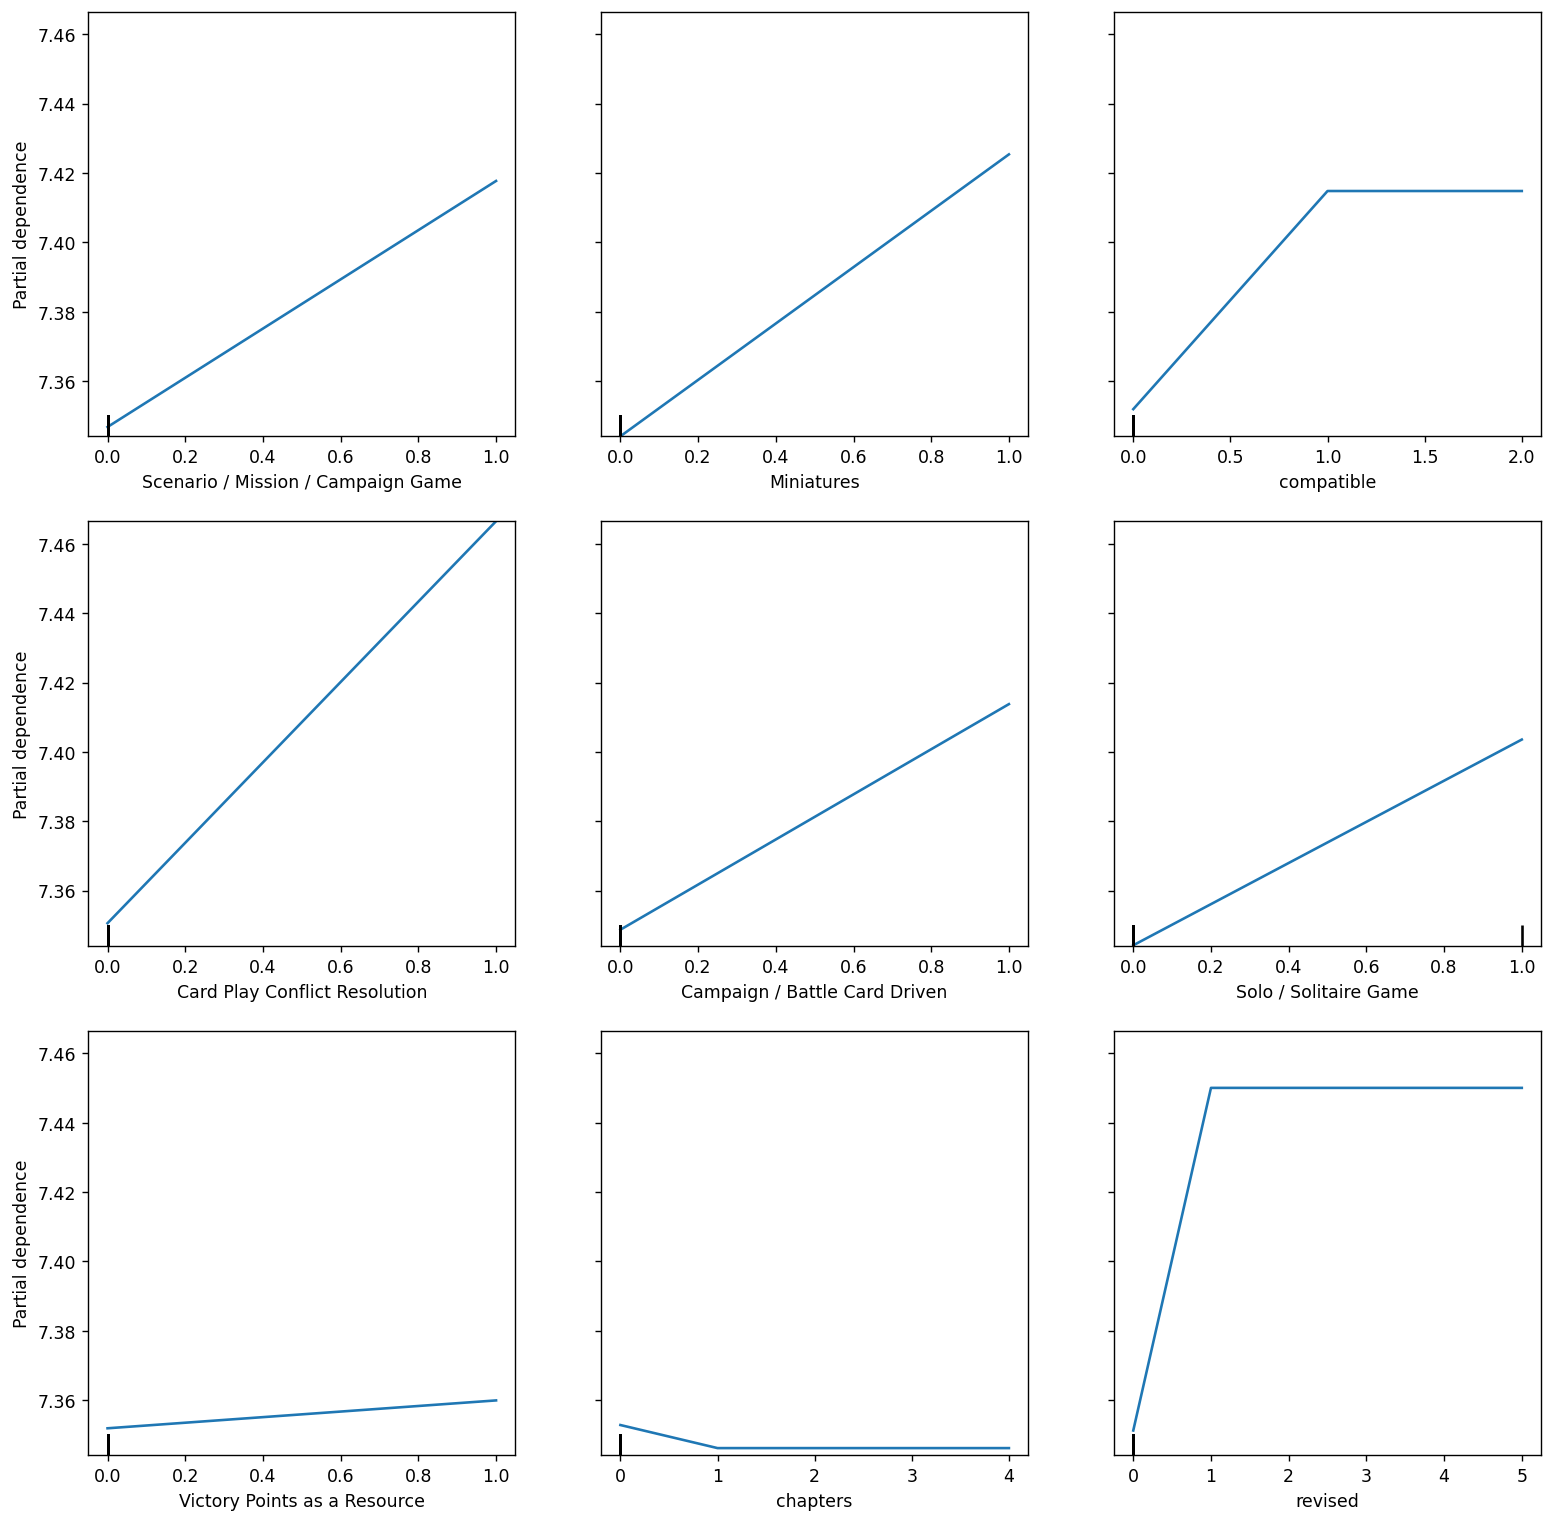

In [11]:
from sklearn.inspection import plot_partial_dependence


# df_sort = df_score.sort_values('score',ascending=False)


fig, ax = plt.subplots(figsize=(15, 15),dpi=125)
plot_partial_dependence(estimator = model,\
                        X = df_feature,\
                        features = df_sort.index.values[0:9],\
                        grid_resolution=20,ax=ax)

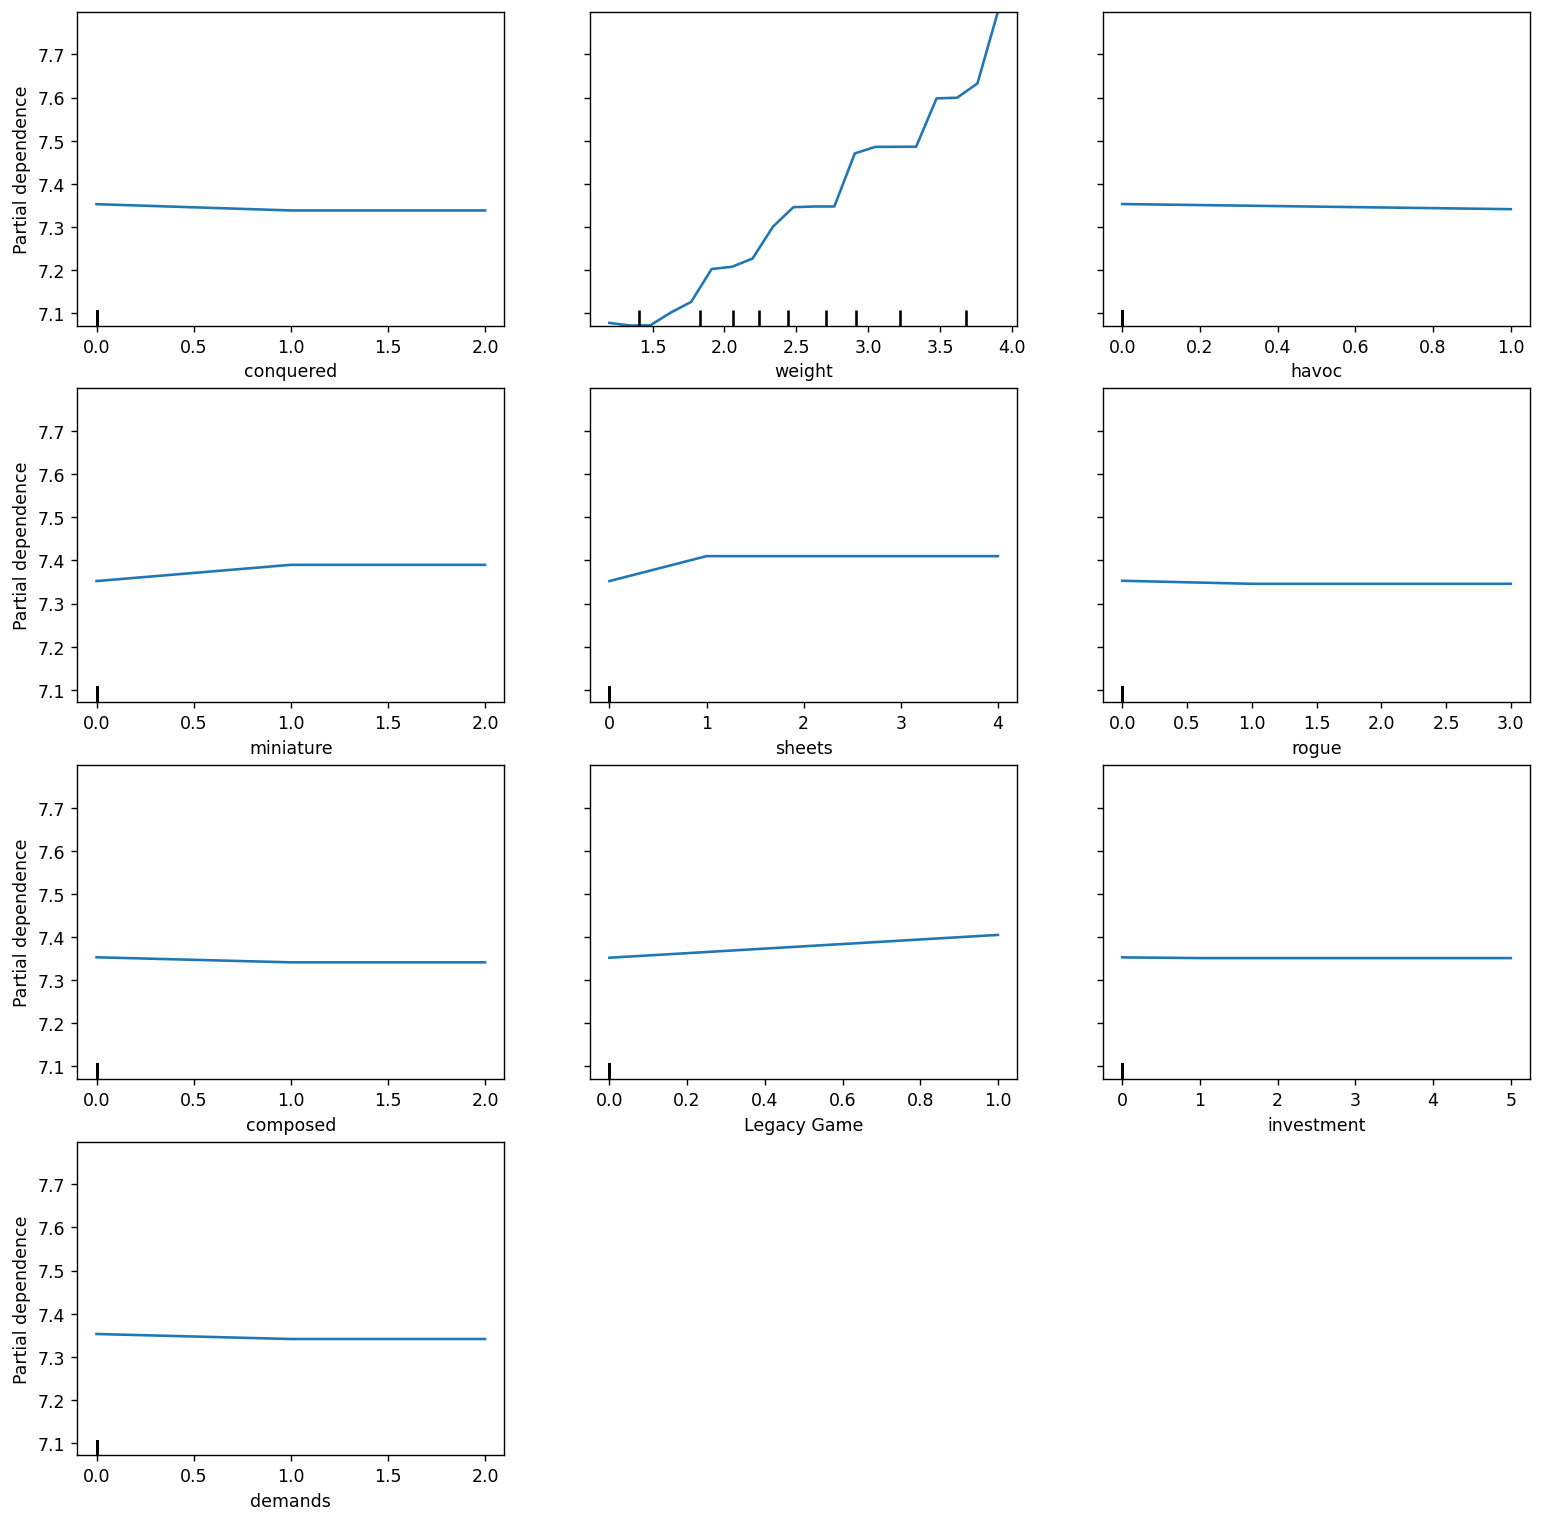

In [12]:
fig, ax = plt.subplots(figsize=(15, 15),dpi=125)
plot_partial_dependence(estimator = model,\
                        X = df_feature,\
                        features = df_sort.index.values[10:20],\
                        grid_resolution=20,ax=ax)